**Deep Learning**

*Laboratorio 5*

**Autores:**

- Mariana David 201055
- Pablo Escobar 20936

**Instrucciones**

En parejas, construyan una GAN que sea capaz de generar outputs similares al dataset
MNIST.

Suba su código y un reporte donde explique y jusKfique:

1. Estructura de su G(x)

2. Estructura de su D(x)

3. Muestre los resultados antes y después de su proceso de entrenamiento. 

**No entrenada**

1/1 [==============================] - 0s 200ms/step


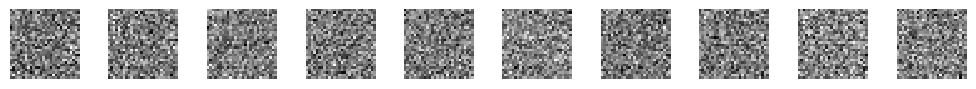

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam

# Definir el generador (G)
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Definir el discriminador (D)
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Construir y compilar el generador y el discriminador
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Construir y compilar la GAN (generador + discriminador)
discriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Función para generar y mostrar imágenes generadas
def plot_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Ejemplo de cómo generar imágenes sin entrenar
plot_generated_images(0, generator)


Epoch 1
4/4 [==============================] - 0s 5ms/step
D Loss: 0.469292551279068, D Accuracy: 77.0000010728836
G Loss: 1.9016629457473755
Epoch 2
4/4 [==============================] - 0s 5ms/step
D Loss: 0.39821234345436096, D Accuracy: 80.50000071525574
G Loss: 2.312767505645752
1/1 [==============================] - 0s 28ms/step


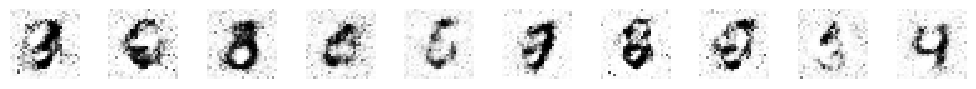

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam

# Cargar el conjunto de datos MNIST
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 127.5 - 1.0  # Escalar las imágenes al rango [-1, 1]


# Definir el generador (G)
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Definir el discriminador (D)
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Construir y compilar el generador y el discriminador
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Construir y compilar la GAN (generador + discriminador)
discriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Función para entrenar la GAN
def train_gan(epochs, batch_size):
    batch_count = X_train.shape[0] // batch_size

    for e in range(1, epochs+1):
        print(f"Epoch {e}")
        for _ in range(batch_count):
            noise = np.random.normal(0, 1, size=[batch_size, 100])
            generated_images = generator.predict(noise)
            image_batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]

            discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(image_batch, np.ones(batch_size))
            d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros(batch_size))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            discriminator.trainable = False

            noise = np.random.normal(0, 1, size=[batch_size, 100])
            g_loss = gan.train_on_batch(noise, np.ones(batch_size))

        print(f"D Loss: {d_loss[0]}, D Accuracy: {100 * d_loss[1]}")
        print(f"G Loss: {g_loss}")

        if e % 10 == 0:
            plot_generated_images(e, generator)

# Función para generar y mostrar imágenes generadas
def plot_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'gan_generated_image_epoch_{epoch}.png')
    plt.show()

# Entrenar la GAN
train_gan(epochs=2, batch_size=100)

# Generar y mostrar imágenes después del entrenamiento
plot_generated_images("final", generator)
